# Data products for O2 stochastic isotropic paper

This notebook shows how to use the data products contained in DCC T1900058 to reproduce the figures in the paper "A search for the isotropic stochastic background with Advanced LIGO's second observing run"

In [1]:
import numpy as np
import matplotlib.style
import matplotlib as mpl
inline_rc = dict(mpl.rcParams)
from matplotlib import pyplot as plt

## Initialize plotting options

In [2]:
mpl.style.use('classic')
plt.rc('text',usetex=True)
plt.rc('font', family='serif')
plt.rcParams.update({'font.size': 15})

## Figure 1

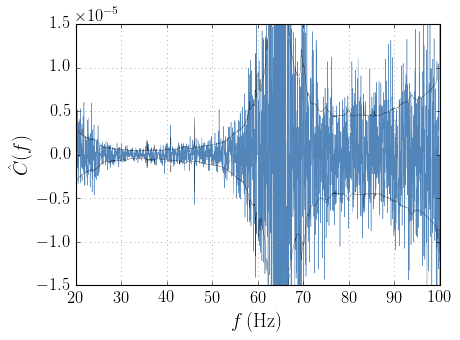

In [3]:
blue='#08519c'
scale=1.5

# Load data
source = 'Figure_1_Cf_spectra_O2.dat'
freqs,Ys,sigmas = np.loadtxt(source,unpack=True)

xs = np.array([0.,1.,2.,3.,4.,5.,6.,7.])
ys = np.power(xs,2.)
ys[5]=0.

# Initialize figure
fig,ax = plt.subplots(figsize=(4*scale,3*scale),facecolor='white')
ax.set_xlim([20.,100.])
ax.set_ylim([-1.5e-5,1.5e-5])

# Plot Data
ax.plot(freqs,Ys,color=blue,zorder=-1,alpha=0.7,lw=0.4)

# Plot error bars
ax.plot(freqs,-sigmas,color='black',lw=0.25)
ax.plot(freqs,sigmas,color='black',lw=0.25)

ax.xaxis.grid(True,which='major',ls=':',color='grey')
ax.yaxis.grid(True,which='major',ls=':',color='grey')
ax.set_xlabel(r'$f \,(\mathrm{Hz})$',fontsize=12*scale)
ax.set_ylabel(r'$\hat C(f)$',fontsize=12*scale)
ax.tick_params(labelsize=10*scale)
ax.yaxis.offsetText.set_fontsize(10*scale)
ax.ticklabel_format(axis='y', style='sci', scilimits=(-2, 2))
ax.set_axisbelow(True)
plt.tight_layout()

plt.show()

## Figure 2

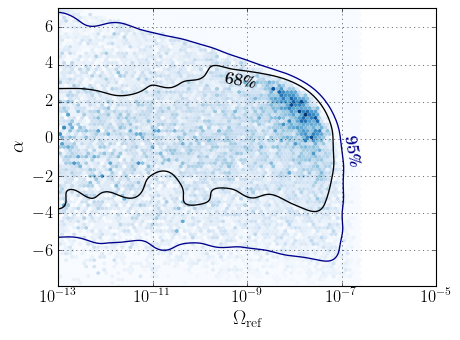

In [4]:
# Load TVS posterior samples
OmgT,aT = np.loadtxt(\
    'Figure_2_posterior.dat',\
    unpack=True,usecols=(0,1))

# Load contour data
contour68_x,contour68_y = np.loadtxt('contourData_68.dat',unpack=True)
contour95_x,contour95_y = np.loadtxt('contourData_95.dat',unpack=True)

# colors
lightBlue=(166./255.,206./255.,227./255.,0.8)
darkBlue=(31./255.,120./255.,180./255.)
lightGreen=(178./255.,223./255.,138./255.,0.8)
darkGreen=(51./255.,160./255.,44./255.)
lightRed=(251./255.,154./255.,153./255.,0.8)
darkRed=(227./255.,26./255.,28./255.)

# Initialize figure
scale=1.5
fig,ax = plt.subplots(figsize=(4*scale,3*scale),facecolor='white')

# Create contour plot using external function
# WARNING: This step takes some time (~20 min) to run
# See make2DContour.py for more details regarding contour creation
#make2DContour(ax,OmgT,aT,-13.,-5.,-8.,8.,mirrorX=-13.,mirrorY=-8.,hexgridsize=75)

# Hexbin data
ax.hexbin(OmgT,aT,cmap='Blues',gridsize=75,linewidths=(0,))

ax.plot(contour68_x,contour68_y,color='black',lw=1.2)
ax.plot(contour95_x,contour95_y,color='darkblue',lw=1.2)

# Format gridlines
ax.xaxis.grid(True,which='major')
ax.yaxis.grid(True,which='major')

# Override tick labels to display powers of 10 (e.g. 10^{-13} instead of -13)
labels=[r"$10^{{{0}}}$".format(x) for x in range(-13,-4,2)]
locs=range(-13,-4,2)
ax.set_xticks(locs)
ax.set_xticklabels(labels)
ax.tick_params(labelsize=10*scale)

# Axes labels
ax.set_xlabel(r'$\Omega_\mathrm{ref}$',fontsize=12*scale)
ax.set_ylabel(r'$\alpha$',fontsize=12*scale)

# Maually place contour labels
### Note that in Fig. 2 the labels were auto-generated by
### matplotlib's ax.contour() function
ax.text(-9.5,3.,'68\%',fontsize=10*scale,rotation=-10)
ax.text(-7.,-0.5,'95\%',fontsize=10*scale,rotation=-80,color='darkblue')

# Save
plt.tight_layout()

## Figure 3

### First, read in the data for the PI curves.

In [5]:
#####
# PI Curves
#####

# file names
O1_PI_file='Figure_3_PICurve_O1.dat'
O1_O2_PI_file='Figures_3_and_4_PICurve_O1O2.dat'
Design_PI_file='Figures_3_and_4_PICurve_Design.dat'

# load in data
freqsO1,sigmaO1,PIO1=np.loadtxt(O1_PI_file,unpack=True,skiprows=4)
freqsO1O2,sigmaO1O2,PIO1O2=np.loadtxt(O1_O2_PI_file,unpack=True,skiprows=4)
freqsDesign,PIDesign=np.loadtxt(Design_PI_file,unpack=True)

# convert from 1 sigma to desired level of sensitivity
nsigmas=2
PIO1=nsigmas*PIO1
PIO1O2=nsigmas*PIO1O2
PIDesign=nsigmas*PIDesign 

### Next, read in the CBC models and normalize them to the observed local rates.

In [6]:
freqsCBC,omegaBBH_Rate1,omegaBNS_Rate1,omegaNSBH_Rate1=np.loadtxt('Figure_3_CBC_models_Rate_1.dat',unpack=True)

# define BBH rates (from arxiv:1811.12907, using GstLAL)
bbh_power_rate_med = 56 #per Gpc^3 per yr
bbh_power_rate_max = 56+44 #per Gpc^3 per yr
bbh_power_rate_min = 56-27 #per Gpc^3 per yr

# define BNS rates (from arxiv:1811.12907, using GstLAL)
bns_rate_med=920 # Gpc^{-3} yr^{-1}
bns_rate_max=920+2220 #  Gpc^{-3} yr^{-1}
bns_rate_min=920-790 # Gpc^{-3} yr^{-1}

# NSBH rate (MNS=1.4, MBBH=10, GstLAL isotropic spin)
rate_NSBH=475 # Gpc^{-3} yr^{-1}

# define max, median, min for BBH, BNS, and Total (=BBH+BNS)
OmegaBBH_max = bbh_power_rate_max * omegaBBH_Rate1
OmegaBBH_med = bbh_power_rate_med * omegaBBH_Rate1
OmegaBBH_min = bbh_power_rate_min * omegaBBH_Rate1

OmegaBNS_max = bns_rate_max * omegaBNS_Rate1
OmegaBNS_med = bns_rate_med * omegaBNS_Rate1
OmegaBNS_min = bns_rate_min * omegaBNS_Rate1

OmegaTotal_max = OmegaBBH_max + OmegaBNS_max
OmegaTotal_med = OmegaBBH_med + OmegaBNS_med
OmegaTotal_min = OmegaBBH_min + OmegaBNS_min

# define upper limit for NSBH
NSBH=rate_NSBH*omegaNSBH_Rate1

### Set plotting options.

In [7]:
import warnings
warnings.filterwarnings('ignore')
mpl.rcParams.update(inline_rc)
plt.rc('text',usetex=True)
plt.rc('font', family='serif')
plt.rcParams.update({'font.size': 15})

### Finally, make the plot.

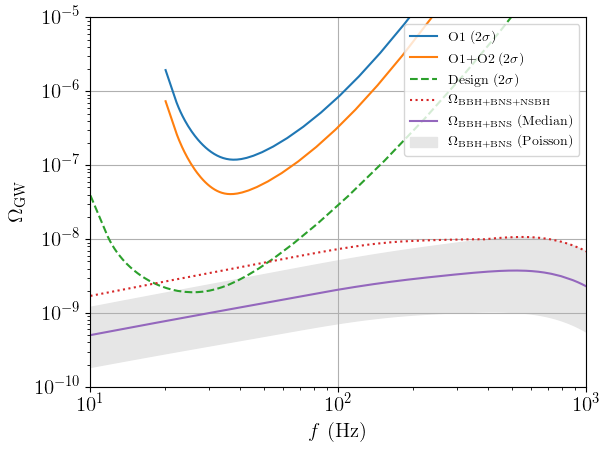

In [8]:
# plot PI curves
plt.loglog(freqsO1,PIO1,label='O1 (%u$\sigma$)'%nsigmas)
plt.loglog(freqsO1O2,PIO1O2,label='O1+O2 (%u$\sigma$)'%nsigmas)
plt.loglog(freqsDesign,PIDesign,label='Design (%u$\sigma$)'%nsigmas,linestyle='--')

# plot CBC model curves

# NSBH
Omega_with_NSBH=NSBH+OmegaTotal_max 
plt.loglog(freqsCBC,Omega_with_NSBH,':',label=r'$\Omega_{\rm BBH+BNS+NSBH}$')

# BBH+BNS
plt.loglog(freqsCBC,OmegaTotal_med,label=r'$\Omega_{\rm BBH+BNS}$ (Median)')

# Poisson Error
plt.fill_between(freqsCBC,OmegaTotal_min,OmegaTotal_max,color=(0.9, 0.9, 0.9),label=r'$\Omega_{\rm BBH+BNS}$ (Poisson)')

# plot parameters
plt.grid()
plt.xlim(10,1000)
plt.ylim(1e-10,1e-5)
plt.xlabel('$f$ (Hz)')
plt.ylabel(r'$\Omega_{\rm GW}$')
plt.legend(loc=1,fontsize=10)

plt.show()

## Figure 4

### Read in $\Omega_{\rm mag}$ assuming O1 and O2 coupling functions, and make power law fits.

In [9]:
# Load in magnetic data

magFreqs,OmegaMag_1,OmegaMag_2=np.loadtxt('Figure_4_OmegaMag.dat',unpack=True)

###########################
# Make power-law fit to Omega_mag computed with O1 Transfer Function
###########################

# Make a power law fit to Omega_mag from 5 to 300 Hz
cut=(magFreqs>=5)*(magFreqs<=300)
cut = cut*(OmegaMag_1!=0) # do not include notched bins in the power law fit
# run polyfit to get coefficients
Budget_Coeffs_1=np.polyfit(np.log(magFreqs[cut]),np.log(OmegaMag_1[cut]),1)
# extract coefficients
ampl=np.exp(Budget_Coeffs_1[1])
alpha=Budget_Coeffs_1[0]
# compute power law fit for magFreqs
Budget_Fit_1 = ampl * magFreqs**alpha

###########################
# Make power-law fit to Omega_mag computed with O2 Transfer Function
###########################
# Make a power law fit to Omega_mag from 5 to 300 Hz
cut=(magFreqs>=5)*(magFreqs<=300)
cut = cut*(OmegaMag_2!=0) # do not include notched bins in the power law fit
# run polyfit to get coefficients
Budget_Coeffs_2=np.polyfit(np.log(magFreqs[cut]),np.log(OmegaMag_2[cut]),1)
# extract coefficients
ampl=np.exp(Budget_Coeffs_2[1])
alpha=Budget_Coeffs_2[0]
# compute power law fit for magFreqs
Budget_Fit_2 = ampl * magFreqs**alpha

### Make the plot.

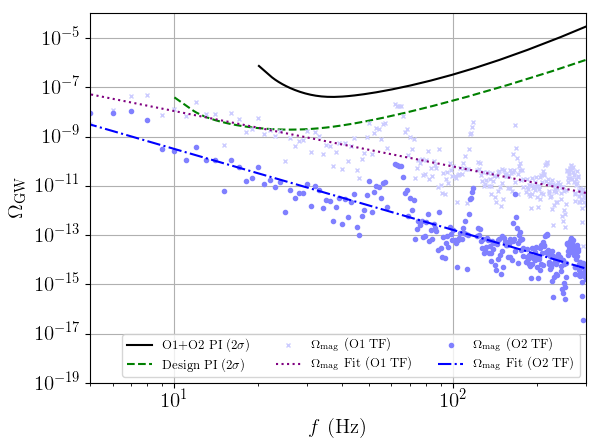

In [10]:
#mpl.style.use('default')

# O1+O2 PI curve
plt.loglog(freqsO1O2,PIO1O2,color='black',label='O1+O2 PI (%u$\sigma$)'%nsigmas)

# Design PI curve
plt.loglog(freqsDesign,PIDesign,color='green',linestyle='--',label='Design PI (%u$\sigma$)'%nsigmas)


# Dots for estimate from O1 TF
plt.loglog(magFreqs,OmegaMag_1,'x',color=(0.8,0.8,1),markersize=3,label=r'$\Omega_{\rm mag}$ (O1 TF)')

# Power law fit using O1 transfer function
plt.loglog(magFreqs,Budget_Fit_1,color='purple',linestyle=':',label=r'$\Omega_{\rm mag}$ Fit (O1 TF)')

# Crosses for estimate from O2 TF
plt.loglog(magFreqs,OmegaMag_2,'o',color=(0.5,0.5,1),markersize=3,label=r'$\Omega_{\rm mag}$ (O2 TF)')

# Power law fit using O2 transfer function
plt.loglog(magFreqs,Budget_Fit_2,color='blue',linestyle='-.',label=r'$\Omega_{\rm mag}$ Fit (O2 TF)')

# Plotting options
# Axis labels
plt.xlabel(r'$f$ (Hz)')
plt.ylabel(r'$\Omega_{\rm GW}$')
# Axis limits
plt.xlim(5,300)
plt.ylim(1e-19,1e-4)
# Grid
plt.grid()
# Legend
plt.legend(loc=4,fontsize=9,ncol=3)

plt.show()